In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [7]:
data=pd.read_csv("..\\CSV files\\HousePricePrediction.xlsx - Sheet1.csv")

In [8]:
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [9]:
X=data.drop(['SalePrice'],axis=1)
Y=data['SalePrice']

In [10]:
len(X)

2919

In [11]:
Y.size

2919

In [12]:
obj=(data.dtypes=='object')
num=(data.dtypes=='int')
fl=(data.dtypes=='float')

In [13]:
obj_cols=obj[obj].index
num_cols=obj[obj].index
fl_cols=obj[obj].index


C:\Users\vishn\AppData\Local\Temp\ipykernel_18608\708226621.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ht_map=sns.heatmap(data.corr(),annot=True,fmt='.2f',linewidths=2,cmap='Reds',square=True)


Axes(0.125,0.185;0.62x0.62)


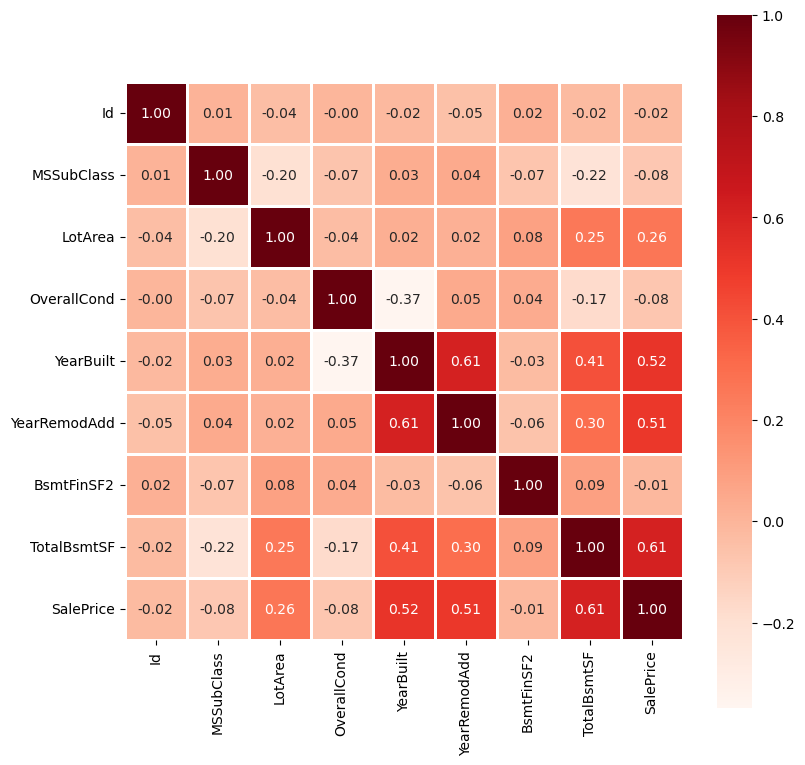

In [14]:
plt.figure(figsize=(9,9))
ht_map=sns.heatmap(data.corr(),annot=True,fmt='.2f',linewidths=2,cmap='Reds',square=True)
print(ht_map)

In [15]:
unique_values=[]
for val in obj_cols:
    unique_values.append(data[val].unique().size)

<Axes: title={'center': 'No.of unique values in categorical features'}>

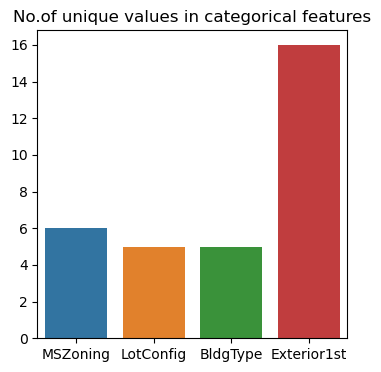

In [16]:
plt.figure(figsize=(4,4))
plt.title("No.of unique values in categorical features")
sns.barplot(x=obj_cols,y=unique_values)


C:\Users\vishn\AppData\Local\Temp\ipykernel_18608\1738538097.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 4, index)


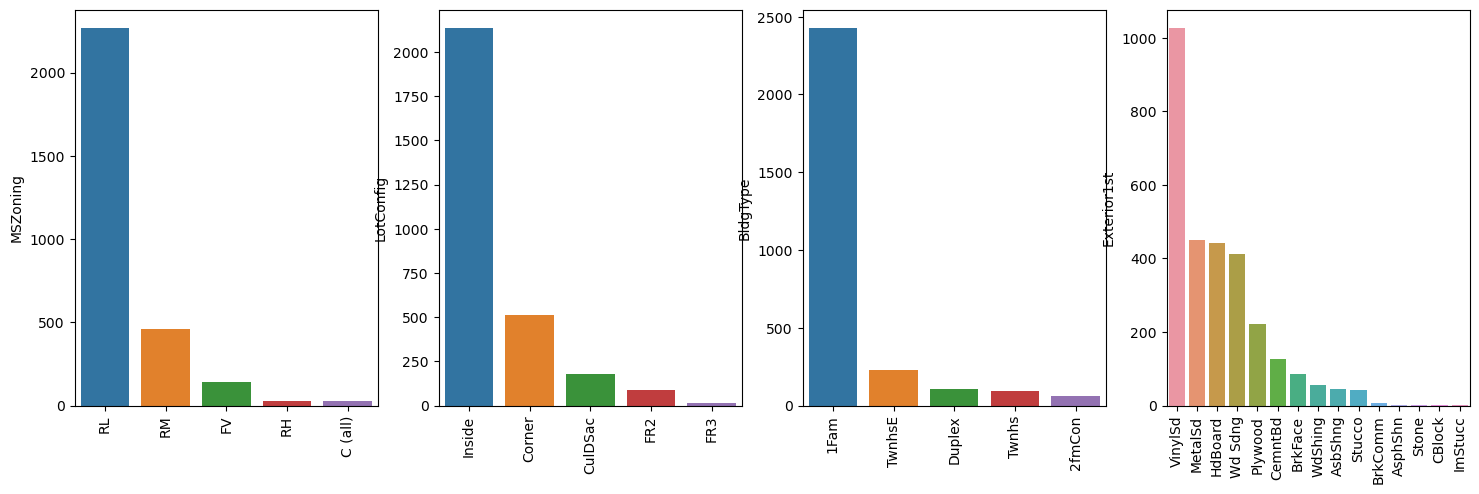

In [17]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in obj_cols:
    y = data[col].value_counts()
    plt.subplot(6, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

# DATA CLEANING


In [63]:
data.drop(['Id'],axis=1,inplace=True)

In [19]:
data['SalePrice'].isnull().sum()


In [65]:
data['SalePrice'].fillna(data['SalePrice'].mean(),inplace=True)

In [66]:
data.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [67]:
data.dropna(inplace=True)

In [68]:
data.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [70]:
#from sklearn.impute import KNNImputer

#Imputer = KNNImputer(n_neighbors=2)
#Imputer.fit_transform(data['SalePrice'])

In [71]:
data.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [72]:
#OneHotEncoding
#categorical val
print(obj_cols)

Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')


In [73]:
OH_Encoder=OneHotEncoder(sparse_output=False)
OH_cols=pd.DataFrame(OH_Encoder.fit_transform(data[obj_cols]))
OH_cols.index = data.index
OH_cols.columns = OH_Encoder.get_feature_names_out()
data_final=data.drop(obj_cols,axis=1)
data_final=pd.concat([OH_cols,data_final],axis=1)

In [74]:
data_final

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Exterior1st_Wd Sdng,Exterior1st_WdShing,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,60,11250,5,2001,2002,0.0,920.0,223500.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,70,9550,5,1915,1970,0.0,756.0,140000.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,60,14260,5,2000,2000,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,60,7917,5,1999,2000,0.0,953.0,175000.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,20,13175,6,1978,1988,163.0,1542.0,210000.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,70,9042,9,1941,2006,0.0,1152.0,266500.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,20,9717,6,1950,1996,1029.0,1078.0,142125.0


# Training & Testing

In [75]:
X=data_final.drop(['SalePrice'],axis=1)
Y=data_final['SalePrice']

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

We will check the accuracy of this continuous variables using different techinques

In [77]:
#SVM

model_svm=svm.SVR()
model_svm.fit(X_train,Y_train)
Y_pred=model_svm.predict(X_test)
print(mean_absolute_percentage_error(Y_test, Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

0.32241336902330436
54964.79384579795


In [78]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=50)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)
 
print(mean_absolute_percentage_error(Y_test, Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

0.13002590969301725
21559.160057077625


In [79]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)
 
print(mean_absolute_percentage_error(Y_test, Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

0.18845797268689773
32684.45562947164


Among three SVM performed well scored less mean absolute percentage error
